In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 
import os
os.chdir(r"C:\Users\Yugant\Desktop\New folder")
df= pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [10]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##
Loan amount has (614-592) 22 missing values.

Loan_Amount_Term has (614 – 600) 14 missing values.

Credit_History has (614 – 564) 50 missing values.

We can also look that about 84% applicants have a credit_history.

The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome


In [12]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

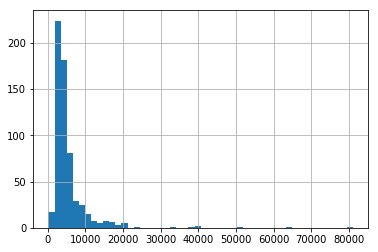

In [13]:
df['ApplicantIncome'].hist(bins=50)

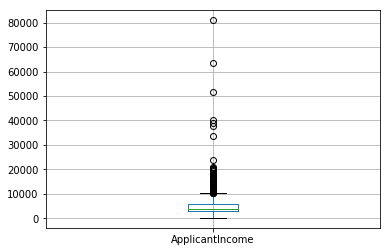

In [14]:
df.boxplot(column="ApplicantIncome")

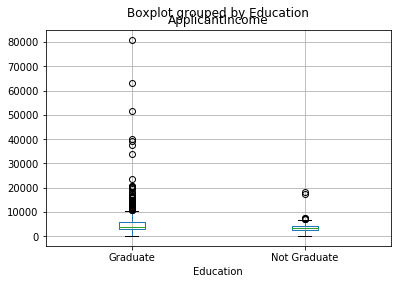

In [15]:
df.boxplot(column="ApplicantIncome", by="Education")

###
We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

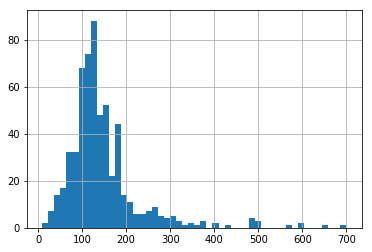

In [16]:
df['LoanAmount'].hist(bins=50)

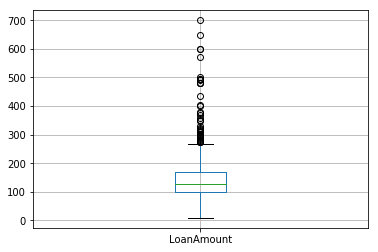

In [17]:
df.boxplot(column='LoanAmount')

### 
Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values,

## Category variables

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print("Frequency table for credit history")
print(temp1)

print ('/nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency table for credit history
0.0     89
1.0    475
Name: Credit_History, dtype: int64
/nProbility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


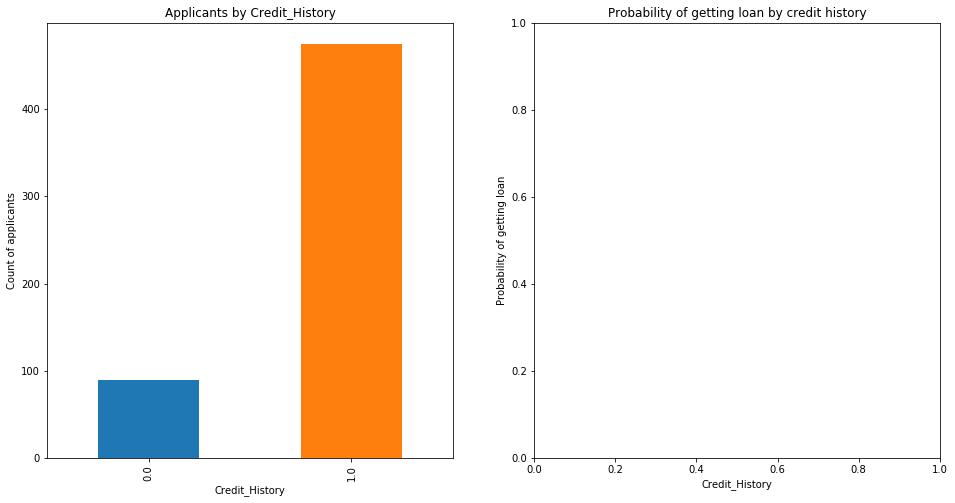

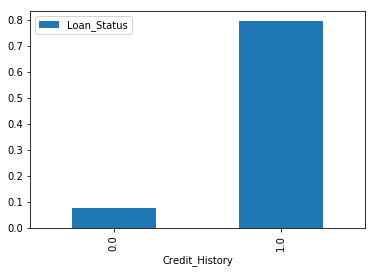

In [20]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of applicants')
ax1.set_title('Applicants by Credit_History')
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit history')
temp2.plot(kind='bar')

##
This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history.

In [21]:
temp3=df['Married'].value_counts(ascending=True)
temp4=df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print("Frequency table for Marriage")
print(temp3)

print ('/nProbility of getting loan for each Marriage status:')
print (temp4)

Frequency table for Marriage
No     213
Yes    398
Name: Married, dtype: int64
/nProbility of getting loan for each Marriage status:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


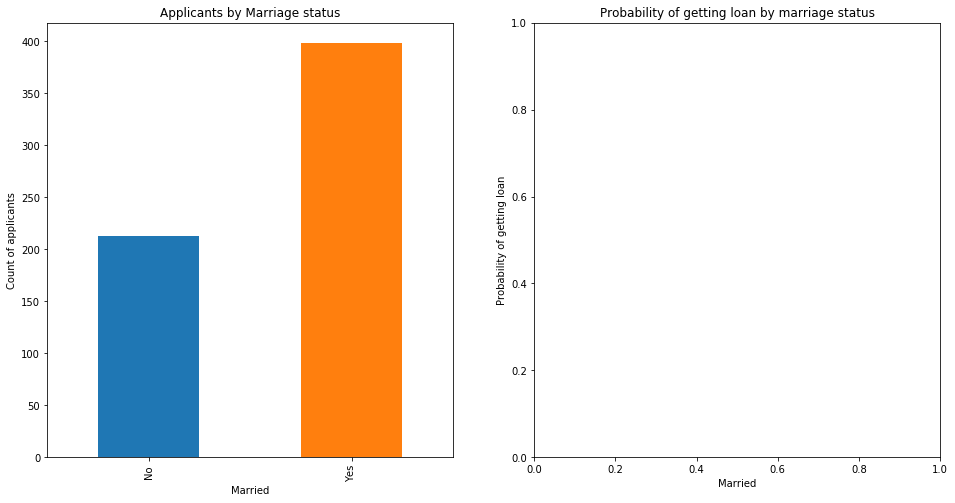

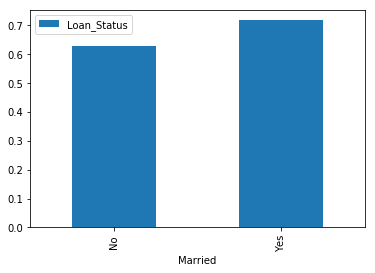

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,8))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count of applicants')
ax1.set_title('Applicants by Marriage status')
temp3.plot(kind='bar')

ax2=fig.add_subplot(122)
ax2.set_xlabel('Married')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by marriage status')
temp4.plot(kind='bar')

### Alternative way

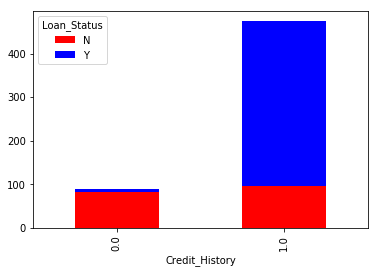

In [23]:
temp5 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp5.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

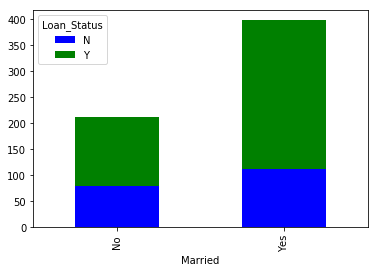

In [24]:
temp6=pd.crosstab(df['Married'],df['Loan_Status'])
temp6.plot(kind='bar',stacked=True,color=['blue','green'],grid=False)

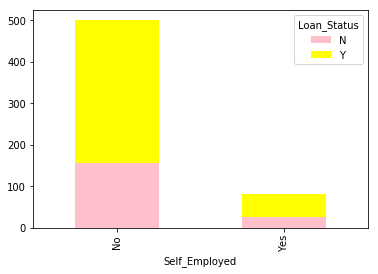

In [25]:
temp7 = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
temp7.plot(kind='bar', stacked=True, color=['pink','yellow'], grid=False)

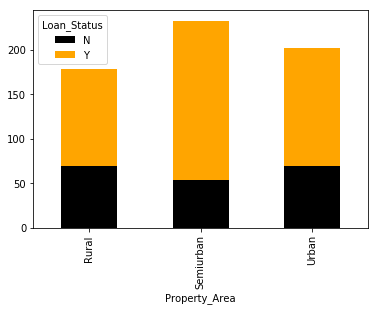

In [26]:
temp8 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
temp8.plot(kind='bar', stacked=True, color=['black','orange'], grid=False)

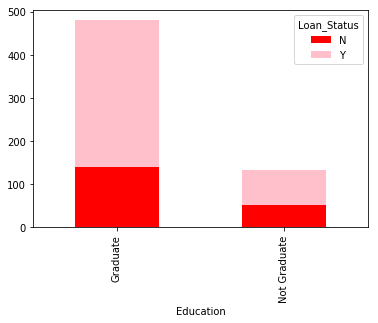

In [27]:
temp9 = pd.crosstab(df['Education'],df['Loan_Status'])
temp9.plot(kind='bar', stacked=True, color=['red','pink'], grid=False)

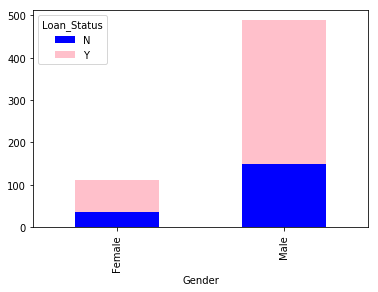

In [28]:
temp10 = pd.crosstab(df['Gender'],df['Loan_Status'])
temp10.plot(kind='bar', stacked=True, color=['blue','pink'], grid=False)

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check missing values in the dataset


In [30]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

##### Since 82% are not self  employed, it is safe to impute the missing values as “No” as there is a high probability of success.

In [32]:
df['Self_Employed'].fillna('No', inplace=True)

In [33]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed',columns='Education', aggfunc=np.median)
print(table)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


### For extreme values in distribution of LoanAmount and ApplicantIncome

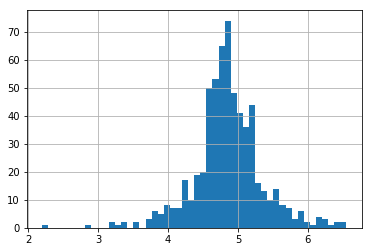

In [34]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=50)

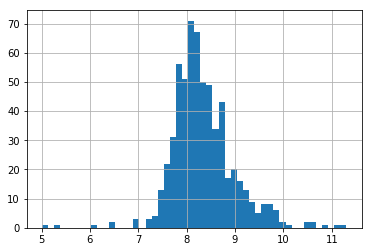

In [35]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
df['ApplicantIncome_log'].hist(bins=50)

#### Now, distribution looks closer to Normal

In [36]:
# Imputing other variables

In [37]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## Building a Predictive Model in Python

In [38]:
from sklearn.preprocessing import LabelEncoder
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le= LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID                 object
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
LoanAmount_log         float64
ApplicantIncome_log    float64
dtype: object

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,8.430109
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,7.856707
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,8.699515


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 10 folds
  kf = KFold(data.shape[0], n_folds=10)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

## Logistic Regression

## 
We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:
1.Applicants having a credit history (remember we observed this in exploration?)
2.Applicants with higher applicant and co-applicant incomes
3.Applicants with higher education level
4.Properties in urban areas with high growth perspectives
So let’s make our first model with ‘Credit_History’.


In [57]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.960%


In [58]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.960%


## Decision Tree

In [59]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.960%


## Random Forest

In [61]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','ApplicantIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.197%


## 
Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

Reducing the number of predictors

Tuning the model parameters

Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [62]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History         0.262945
ApplicantIncome_log    0.258246
LoanAmount_log         0.227403
Dependents             0.054313
Property_Area          0.052208
Loan_Amount_Term       0.050484
Married                0.028506
Education              0.024410
Gender                 0.020838
Self_Employed          0.020648
dtype: float64


#### Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

In [65]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['ApplicantIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.085%
Cross-Validation Score : 81.290%
